In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
#Reading the data
files = glob.glob("*cybersecurity_attacks_cleaned.csv")


In [3]:
#Creating a list of dataframes
dfs = []
for file in files:
    dfs.append(pd.read_csv(file))
    

In [4]:
#Concatenating all dataframes into one
df = pd.concat(dfs, ignore_index=True)

#Checking the shape of the dataframe
print(df.shape)

(40000, 30)


In [5]:
#display random 15 rows
df.sample(15)


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Year,Month,Date,Hour,Day
14389,2021-12-09 17:22:25,110.210.206.127,195.87.119.215,56835,62741,TCP,627,Data,FTP,Ipsum vel quasi ad. Illum placeat odio quidem ...,...,"Madhyamgram, Chhattisgarh",21.99.104.74,Log Data,NaN,Firewall,2021,December,9,17,Thursday
9154,2022-07-10 05:55:57,65.165.171.147,76.60.105.163,34910,46199,UDP,631,Data,FTP,Voluptates qui corporis soluta possimus.\nAspe...,...,"Ghaziabad, Jharkhand",199.10.26.14,Log Data,Alert Data,Server,2022,July,10,5,Sunday
18579,2022-12-13 20:47:22,45.150.66.117,191.161.101.33,51271,7395,ICMP,641,Control,DNS,Doloribus ut voluptas laborum. Vitae eos quam ...,...,"Jaipur, Odisha",65.87.135.18,NaN,NaN,Firewall,2022,December,13,20,Tuesday
8537,2022-12-04 04:44:25,175.186.248.142,214.54.2.254,36299,23884,UDP,1261,Control,HTTP,Facilis assumenda at voluptatum aperiam. Occae...,...,"Mau, Haryana",102.211.187.127,Log Data,Alert Data,Server,2022,December,4,4,Sunday
34267,2022-01-25 18:49:49,155.5.14.255,117.224.40.182,52673,35710,UDP,1172,Data,FTP,Facilis beatae deleniti quas enim eaque. Facil...,...,"Danapur, Manipur",No Proxy,NaN,Alert Data,Server,2022,January,25,18,Tuesday
19746,2022-06-14 08:03:21,114.76.83.134,151.88.104.125,44446,2308,UDP,609,Control,HTTP,Quaerat a quibusdam earum aut expedita eveniet...,...,"Berhampore, Nagaland",No Proxy,NaN,Alert Data,Firewall,2022,June,14,8,Tuesday
15091,2020-05-25 16:21:25,62.106.122.161,109.92.169.92,31468,13365,UDP,420,Data,FTP,Labore aliquam ab illum fuga fugit delectus. A...,...,"Baranagar, Rajasthan",No Proxy,NaN,Alert Data,Server,2020,May,25,16,Monday
29334,2023-06-25 23:15:18,205.140.79.2,221.29.212.8,9762,62584,TCP,1377,Control,FTP,Incidunt reiciendis voluptatem. Numquam accusa...,...,"Berhampur, Kerala",113.9.182.82,Log Data,Alert Data,Server,2023,June,25,23,Sunday
27321,2020-09-19 05:56:57,132.151.49.170,191.191.179.127,44826,31489,UDP,1212,Data,DNS,Iusto ea adipisci quod necessitatibus quam mol...,...,"Mau, Gujarat",112.127.85.197,NaN,NaN,Firewall,2020,September,19,5,Saturday
23331,2022-11-15 07:43:30,168.215.223.117,112.113.132.82,28242,50749,TCP,827,Data,FTP,Eligendi dolore autem exercitationem. Laudanti...,...,"Hospet, Nagaland",1.180.189.201,Log Data,Alert Data,Server,2022,November,15,7,Tuesday


In [6]:
#Checking the data types of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

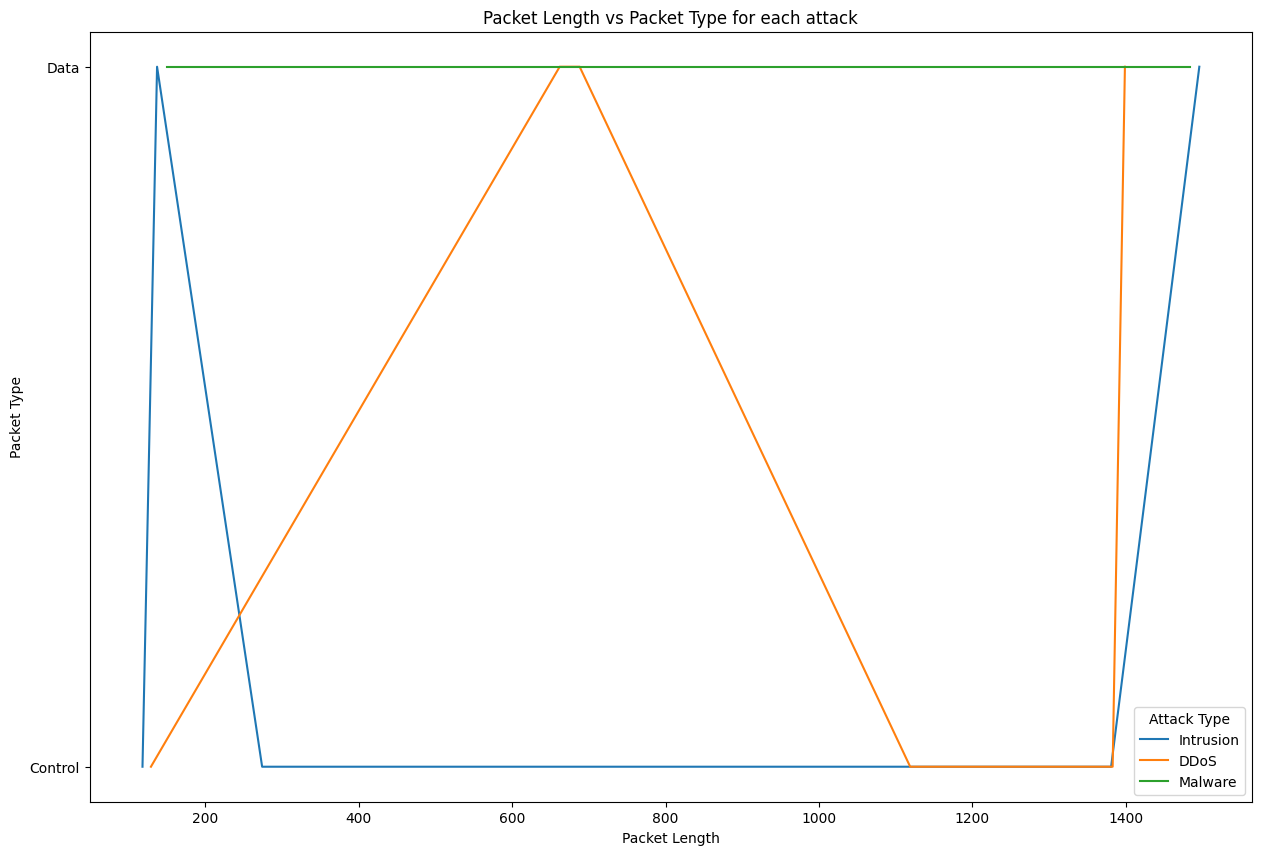

In [7]:
#plot line line graph of packet length vs packet type for each attack ramdomly of 15 rows
plt.figure(figsize=(15,10))
sns.lineplot(x='Packet Length', y='Packet Type', data=df.sample(15), hue='Attack Type')
plt.title('Packet Length vs Packet Type for each attack')
plt.show()


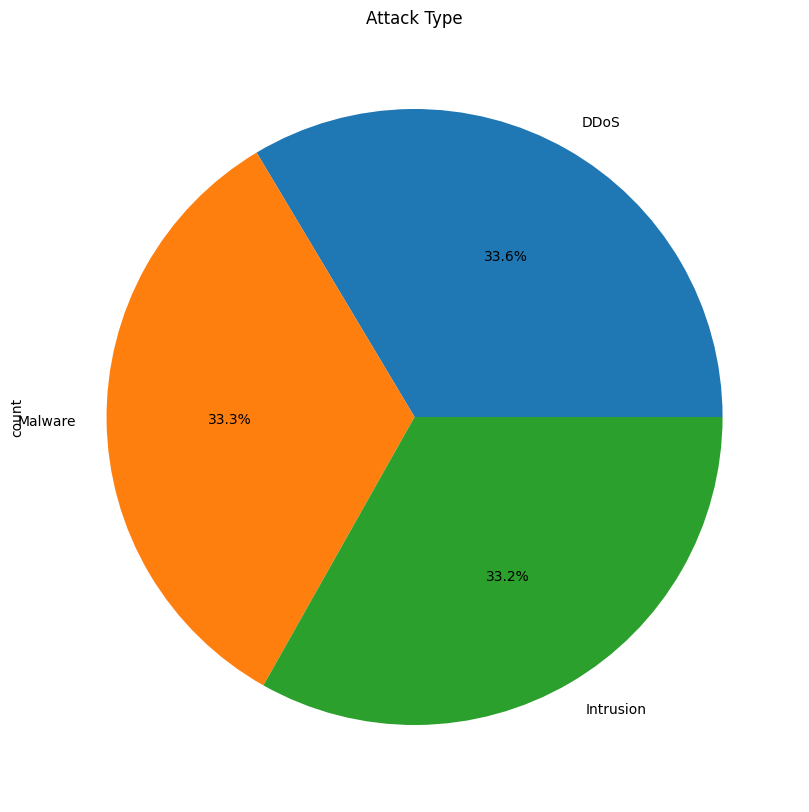

In [8]:
#plot pie chart of attack type of random 15 rows
plt.figure(figsize=(15,10))
df['Attack Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Attack Type')
plt.show()


In [9]:
#building a model of sequential model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [10]:
#Encoding the categorical data
encoder = LabelEncoder()
df['Attack Type'] = encoder.fit_transform(df['Attack Type'])
df['Attack Type'].value_counts()


Attack Type
0    13428
2    13307
1    13265
Name: count, dtype: int64

In [11]:
#Splitting the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [12]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [13]:
#defining the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=10))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [14]:
#building a model of sequential model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [15]:
#Encoding the categorical data
encoder = LabelEncoder()
df['Attack Type'] = encoder.fit_transform(df['Attack Type'])
df['Attack Type'].value_counts()


Attack Type
0    13428
2    13307
1    13265
Name: count, dtype: int64

In [16]:
#lstm model
from keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from keras.preprocessing import sequence

#Splitting the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#defining the model
model = Sequential()
model.add(Embedding(5000, 32, input_length=10))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))




In [17]:
#Adding the input and first hidden layer
model.add(Dense(32, activation='relu', input_dim=10))
model.add(Dropout(0.2))


In [18]:
print(type(X_test))
print(type(y_test))
print(X_test.dtype)  # if applicable for NumPy arrays
print(y_test.dtype)  # if applicable for NumPy arrays


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
object
object


In [19]:
# from keras.models import Sequential
# from keras.layers import Dense

# # Define your model
# model = Sequential()
# model.add(Dense(64, input_dim=10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Now you can train your model using model.fit() before evaluating it
# # For example:
# # model.fit(X_train, y_train, epochs=10, batch_size=32)

# # After training, you can evaluate the model
# scores = model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1] * 100))


In [20]:
# #plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(15,10))
# sns.heatmap(cm, annot=True)
# plt.title('Confusion Matrix')
# plt.show()

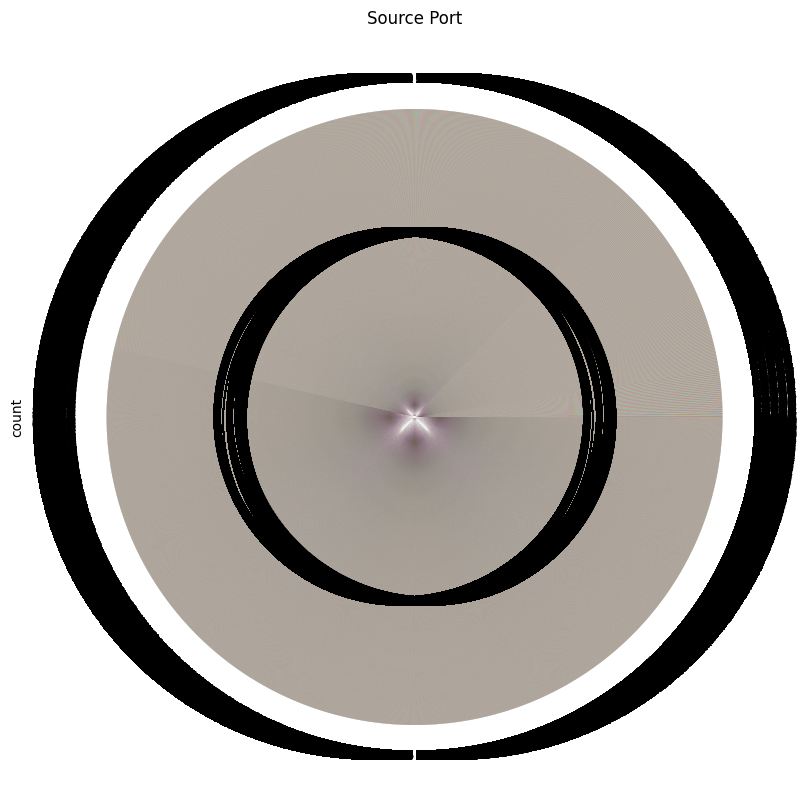

In [21]:
#plot pie chart of IP Address  vs source port of random 15 rows
plt.figure(figsize=(15,10))
df['Source Port'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Source Port')
plt.show()


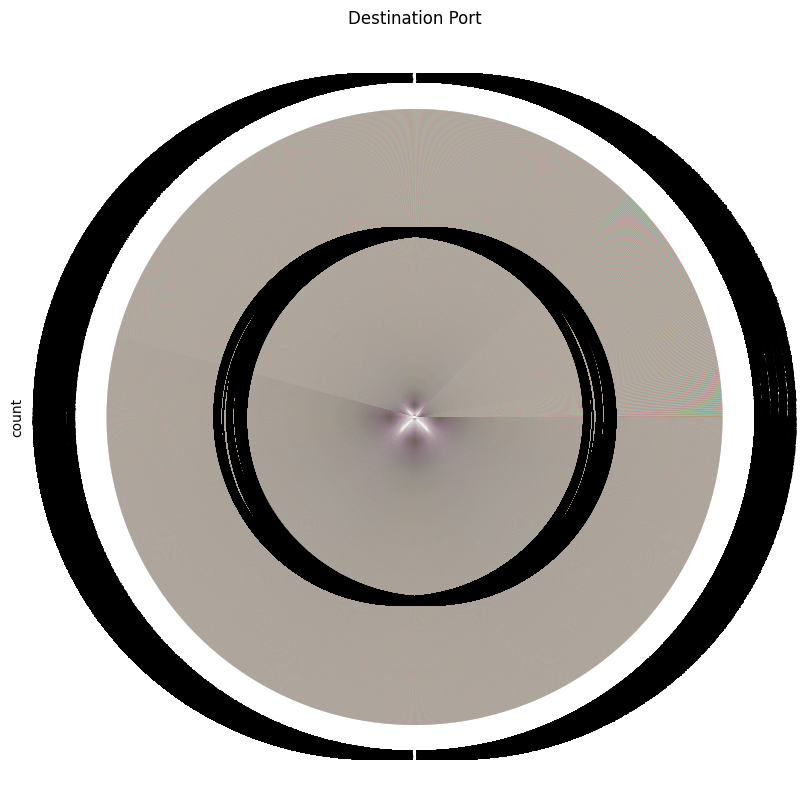

In [22]:
#plot pie chart of IP Address  vs destination port of random 15 rows
plt.figure(figsize=(15,10))
df['Destination Port'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Destination Port')
plt.show()

In [23]:
# #plot pie chart of IP Address  vs protocol of random 15 rows
# plt.figure(figsize=(15,10))
# df['Protocol'].value_counts().plot.pie(autopct='%1.1f%%')
# plt.title('Protocol')
# plt.show()


In [24]:
#plot pie chart of IP Address  vs flow duration of random 15 rows
plt.figure(figsize=(15,10))
df['Flow Duration'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Flow Duration')
plt.show()

KeyError: 'Flow Duration'

<Figure size 1500x1000 with 0 Axes>